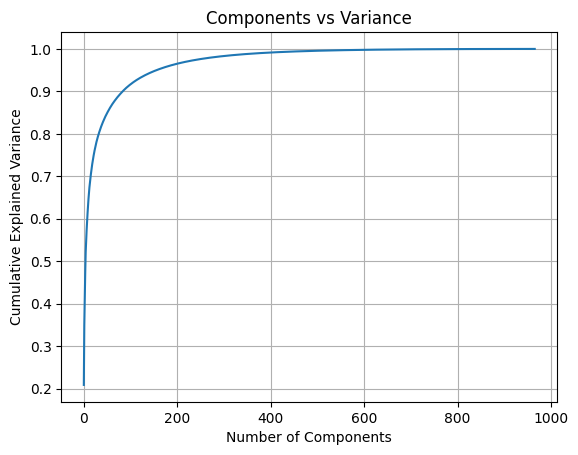

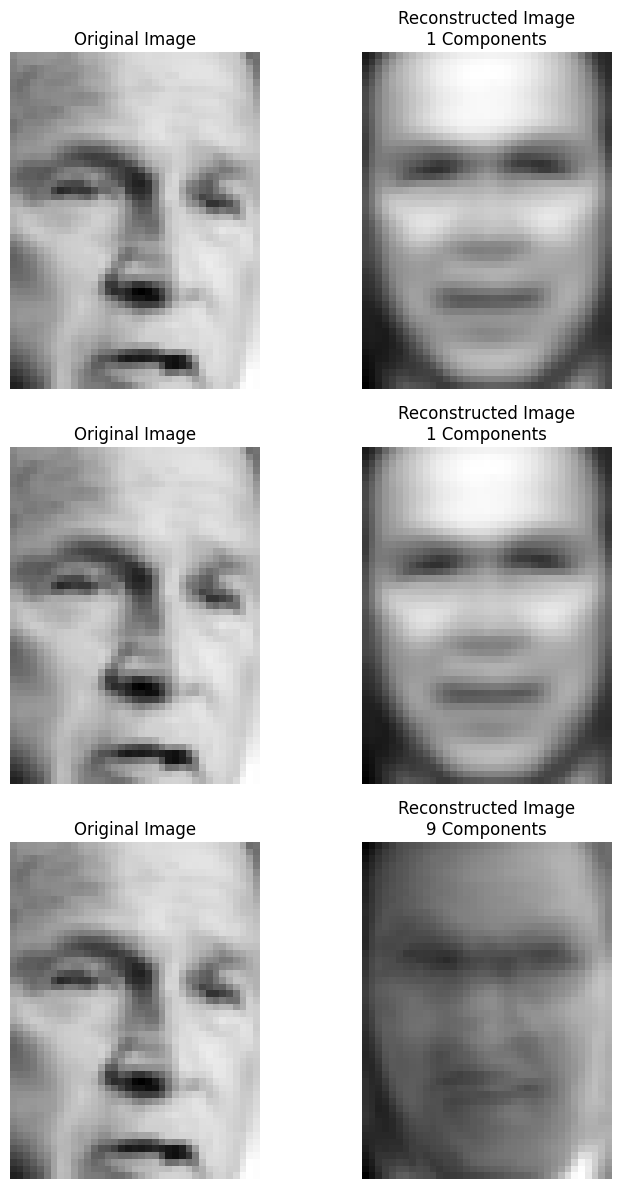

In [1]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt


lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute PCA (eigenfaces) on the face dataset without specifying the number of components
pca = PCA(svd_solver='randomized', whiten=True).fit(X_train)

# Calculate the cumulative sum of explained variances
explained_variances = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain a certain percentage of the variance
percentages = [0.10, 0.15, 0.60]
n_components = [np.argmax(explained_variances >= p) + 1 for p in percentages]

# Select the top k eigenfaces, project the training set onto the eigenfaces, and reconstruct the images
images_reconstructed = []
for n in n_components:
    pca = PCA(n_components=n, svd_solver='randomized', whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_reconstructed = pca.inverse_transform(X_train_pca)
    images_reconstructed.append(X_reconstructed)

# Plot the cumulative explained variances
plt.figure()
plt.plot(explained_variances)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Components vs Variance')
plt.grid(True)
plt.show()

# Plot the original images and the reconstructed images
fig, ax = plt.subplots(len(n_components), 2, figsize=(8, 4 * len(n_components)))

for i, images in enumerate(images_reconstructed):
    ax[i, 0].imshow(X_train[0].reshape((h, w)), cmap=plt.cm.gray)
    ax[i, 0].set_title('Original Image')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(images[0].reshape((h, w)), cmap=plt.cm.gray)
    ax[i, 1].set_title(f'Reconstructed Image\n{n_components[i]} Components')
    ax[i, 1].axis('off')

plt.tight_layout()
plt.show()